In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beauty = pd.read_csv("C:\\Users\\Lauren Key\\Documents\\DA11\\Python\\Capstone Health Analysis\\cscpopendata (1).csv")

In [3]:
beauty.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [30]:
beauty.shape

(114635, 22)

In [4]:
distinct_brands = beauty['BrandName'].nunique()

print(f"Number of distinct brand names: {distinct_brands}")

Number of distinct brand names: 2713


In [5]:
distinct_company = beauty['CompanyName'].nunique()

print(f"Number of distinct company names: {distinct_company}")

Number of distinct company names: 606


In [9]:
distinct_company_products = beauty.groupby('CompanyName')['ProductName'].apply(list).reset_index()

# Renaming columns for clarity
distinct_company_products.columns = ['CompanyName', 'Products']

In [10]:
distinct_company_names = beauty['CompanyName'].unique()

print(distinct_company_names)

['New Avon LLC' 'J. Strickland & Co.' 'OPI PRODUCTS INC.'
 'GOJO Industries, Inc.' 'CHANEL, INC' 'Aloecare International, LLC'
 'Entity Beauty, Inc.' 'Revlon Consumer Product Corporation' 'Dermalogica'
 'CLARINS S.A.' 'McConnell Labs, Inc.' 'Philosophy'
 "Physician's Care Alliance, LLC" "L'Oreal USA" 'Elizabeth Arden, Inc.'
 'Sunrider Manufacturing, L.P.' 'Romane Fragrances' 'LI Pigments'
 'Tahitian Noni International, Inc.' 'AMCO International'
 'Buth-na-Bodhaige, Inc' 'The Procter & Gamble Company'
 'Bare Escentuals Beauty, Inc.' 'Regis Corporation' 'Bliss World LLC'
 'Merle Norman Cosmetics' 'Zotos International, Inc.'
 'Arcadia Beauty Labs LLC' 'TIGI Linea Corp' 'Colomer U.S.A., Inc.'
 'Alfalfa Nail Supply, Inc.' 'No Lift Nails Inc.'
 'NeoStrata Company, Inc.' 'BeautiControl, Inc.' 'Klein-Becker USA, LLC.'
 'Astara Skin Care' 'Voss Laboratories' 'C.F.E.B. SISLEY' 'Whiter Image'
 'Bremenn Research Labs' 'NOEVIR CO., LTD' 'Young Nails, Inc.'
 'Beiersdorf, Inc.' 'Added Extras LLC' 'Gi

In [11]:
company_product_counts = beauty['CompanyName'].value_counts().reset_index()

# Renaming columns for clarity
company_product_counts.columns = ['CompanyName', 'ProductCount']

# Sorting the DataFrame by ProductCount in descending order
company_product_counts_sorted = company_product_counts.sort_values(by='ProductCount', ascending=False)

print(company_product_counts_sorted)

                             CompanyName  ProductCount
0                            L'Oreal USA          5747
1                                     S+          5165
2                                   Coty          5162
3    Revlon Consumer Product Corporation          4341
4           Bare Escentuals Beauty, Inc.          3828
..                                   ...           ...
565               Athena Cosmetics, Inc.             1
566                     Prima-Derm, S.L.             1
567               DLC Laboratories, Inc.             1
568                       FELPS USA, INC             1
605                  Turquise Global LLC             1

[606 rows x 2 columns]


In [20]:
company_product_counts = beauty['CompanyName'].value_counts()

# Step 2: Filter companies with more than 1000 products
more_than_1000_products = company_product_counts[company_product_counts > 1000].index

# Step 3: Create a new DataFrame with only these companies
filtered_beauty_df = beauty[beauty['CompanyName'].isin(more_than_1000_products)]

filtered_beauty_df.head(30)



,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
46,38,Pure Blends Natural Lipgloss-Natural,NaN,NaN,23,Revlon Consumer Product Corporation,Almay,44,Makeup Products (non-permanent),52,...,13463-67-7,37,Titanium dioxide,08/18/2009,08/18/2009,NaN,08/18/2009,08/18/2009,NaN,1
51,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,353.0,00,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,44,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
52,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,353.0,00,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,45,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
53,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,353.0,00,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,46,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
54,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,354.0,01,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,44,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
55,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,354.0,01,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,47,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
56,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,354.0,01,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,50,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
57,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,355.0,02,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,44,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
58,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,355.0,02,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,48,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1
59,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,355.0,02,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,13463-67-7,51,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1


In [21]:
number_of_rows = filtered_beauty_df.shape[0]

print(f"The number of rows in the new DataFrame is: {number_of_rows}")

The number of rows in the new DataFrame is: 69780


In [24]:
company_product_counts = beauty['CompanyName'].value_counts()

# Step 2: Filter companies with more than 1000 products
more_than_1000_products = company_product_counts[company_product_counts > 1000]

# Step 3: Create a DataFrame from the companies with more than 1000 products
companies_product_counts_df = more_than_1000_products.reset_index()
companies_product_counts_df.columns = ['CompanyName', 'ProductCount']

# Step 4: Merge the product counts back with the original DataFrame
filtered_beauty_df = beauty[beauty['CompanyName'].isin(companies_product_counts_df['CompanyName'])]
merged_df = filtered_beauty_df.merge(companies_product_counts_df, on='CompanyName', how='left')

merged_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,ProductCount
0,38,Pure Blends Natural Lipgloss-Natural,NaN,NaN,23,Revlon Consumer Product Corporation,Almay,44,Makeup Products (non-permanent),52,...,37,Titanium dioxide,08/18/2009,08/18/2009,NaN,08/18/2009,08/18/2009,NaN,1,4341
1,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,353.0,00,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,44,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1,1467
2,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,353.0,00,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,45,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1,1467
3,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,353.0,00,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,46,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1,1467
4,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,354.0,01,22,CLARINS S.A.,CLARINS PARIS,44,Makeup Products (non-permanent),50,...,44,Titanium dioxide,08/24/2009,12/30/2010,NaN,08/24/2009,08/24/2009,NaN,1,1467


SHOWING PRODUCTS WITH GREATER THAN 2 TOXIC CHEMICALS

In [28]:
products_with_high_chemical_count = beauty[beauty['ChemicalCount'] > 2]

products_with_high_chemical_count.head(30)


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
308,156,A&C synergy serum,NaN,NaN,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,99,...,68-26-8,2080,Retinol,08/28/2009,01/24/2018,NaN,09/29/2009,07/03/2012,NaN,3
309,156,A&C synergy serum,NaN,NaN,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,99,...,79-81-2,28022,Vitamin A palmitate,08/28/2009,01/24/2018,NaN,07/03/2012,07/03/2012,NaN,3
310,156,A&C synergy serum,NaN,NaN,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,99,...,25013-16-5,52508,Butylated hydroxyanisole,08/28/2009,01/24/2018,NaN,01/24/2018,01/24/2018,NaN,3
311,156,A&C synergy serum,NaN,NaN,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,100,...,68-26-8,2080,Retinol,08/28/2009,01/24/2018,NaN,09/29/2009,07/03/2012,NaN,3
312,156,A&C synergy serum,NaN,NaN,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,100,...,79-81-2,28022,Vitamin A palmitate,08/28/2009,01/24/2018,NaN,07/03/2012,07/03/2012,NaN,3
313,156,A&C synergy serum,NaN,NaN,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,100,...,25013-16-5,52508,Butylated hydroxyanisole,08/28/2009,01/24/2018,NaN,01/24/2018,01/24/2018,NaN,3
2555,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,922,"Retinol/retinyl esters, when in daily dosages ...",09/14/2009,09/18/2009,NaN,09/14/2009,09/21/2009,09/21/2009,5
2556,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,923,Titanium dioxide,09/14/2009,09/18/2009,NaN,09/14/2009,09/21/2009,09/21/2009,5
2557,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,1254,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",09/14/2009,09/18/2009,NaN,09/18/2009,09/18/2009,09/18/2009,5
2558,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,79-81-2,1446,"Retinol/retinyl esters, when in daily dosages ...",09/14/2009,09/18/2009,NaN,09/21/2009,09/21/2009,NaN,5


In [29]:
distinct_company_names = products_with_high_chemical_count['CompanyName'].unique()

print(distinct_company_names)

["Physician's Care Alliance, LLC" 'Bliss World LLC'
 'Georgia-Pacific Consumer Products LP' 'Coty' 'Palladio Beauty Group'
 'theBalm' 'LEVLAD LLC' 'Regis Corporation' 'PBIGROUP INC' 'purminerals'
 'Aloette Cosmetics Inc.' 'Chattem, Inc.'
 'SkinMedica, an Allergan Company' 'Melaleuca, Inc.'
 'Elizabeth Arden, Inc.' 'LVMH FRAGRANCE BRANDS' 'DERMAQUEST, INC.'
 'Allure Labs, Inc.' "Victoria's Secret Beauty" 'TRUE COSMETICS, LLC'
 'Exclusive Fragrances & Cosmetics' 'Ventura International, Ltd'
 "Good 'N Natural" "Puritan's Pride" 'Vitamin World, Inc.'
 'The Boots Company PLC' 'Fusion Brands Inc.' 'Beauty Solutions, Ltd.'
 'Fisk Industries Inc' 'Caleel+Hayden' 'NSE Products, Inc.'
 'Lush Manufacturing Ltd.' 'MDSolarSciences �'
 'Rituals Cosmetics USA, Inc.' 'MAESA LLC' 'APLICARE, INC'
 'eos Products, LLC'
 'Markwins International, Markwins Beauty Products, Physicians Formula'
 'Chrome Hearts LLC' 'S+' 'Charlotte Tilbury Beauty Ltd' 'MAVALA S.A.'
 'MILANI COSMETICS' 'GUERLAIN' 'Too Faced Cosm

In [31]:
distinct_primary_categories = beauty['PrimaryCategory'].unique()

print(distinct_primary_categories)

['Makeup Products (non-permanent)' 'Hair Care Products (non-coloring)'
 'Nail Products' 'Personal Care Products' 'Sun-Related Products'
 'Bath Products' 'Skin Care Products ' 'Fragrances'
 'Tattoos and Permanent Makeup' 'Hair Coloring Products'
 'Oral Hygiene Products' 'Shaving Products' 'Baby Products']


In [37]:
companies_with_high_chemical_count = merged_df[merged_df['ChemicalCount'] > 2]

companies_with_high_chemical_count.head(100)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,ProductCount
5320,2367,Sally Hansen Mineral Lip Treatment,4046.0,Pink Sapphire,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3008,"Retinol/retinyl esters, when in daily dosages ...",10/05/2009,09/18/2013,NaN,10/05/2009,10/05/2009,NaN,3,5162
5321,2367,Sally Hansen Mineral Lip Treatment,4046.0,Pink Sapphire,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3358,Retinol,10/05/2009,09/18/2013,NaN,10/06/2009,10/06/2009,NaN,3,5162
5322,2367,Sally Hansen Mineral Lip Treatment,4046.0,Pink Sapphire,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,6379,Titanium dioxide,10/05/2009,09/18/2013,NaN,10/12/2009,10/12/2009,NaN,3,5162
5323,2367,Sally Hansen Mineral Lip Treatment,4047.0,Quartz,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3008,"Retinol/retinyl esters, when in daily dosages ...",10/05/2009,09/18/2013,NaN,10/05/2009,10/05/2009,NaN,3,5162
5324,2367,Sally Hansen Mineral Lip Treatment,4047.0,Quartz,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3358,Retinol,10/05/2009,09/18/2013,NaN,10/06/2009,10/06/2009,NaN,3,5162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,2373,Sally Hansen Diamond 12 Hour Lip Treatment,3824.0,Be Dazzled,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,6242,Titanium dioxide,10/05/2009,09/16/2013,NaN,10/12/2009,10/12/2009,NaN,4,5162
5424,2373,Sally Hansen Diamond 12 Hour Lip Treatment,3825.0,Baguette,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3042,"Retinol/retinyl esters, when in daily dosages ...",10/05/2009,09/16/2013,NaN,10/05/2009,10/05/2009,NaN,4,5162
5425,2373,Sally Hansen Diamond 12 Hour Lip Treatment,3825.0,Baguette,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3163,Butylated hydroxyanisole,10/05/2009,09/16/2013,NaN,10/06/2009,10/06/2009,NaN,4,5162
5426,2373,Sally Hansen Diamond 12 Hour Lip Treatment,3825.0,Baguette,171,Coty,Sally Hansen,44,Makeup Products (non-permanent),52,...,3166,Retinol,10/05/2009,09/16/2013,NaN,10/06/2009,10/06/2009,NaN,4,5162


In [35]:
companies_with_high_chemical_count.shape

(4162, 23)

In [40]:
category_counts = products_with_high_chemical_count.groupby('PrimaryCategory').size().reset_index(name='ProductCount')

# Find the category with the most products
most_common_category = category_counts.loc[category_counts['ProductCount'].idxmax()]

print("Category with the most products with ChemicalCount > 2:")
print(most_common_category)

Category with the most products with ChemicalCount > 2:
PrimaryCategory    Makeup Products (non-permanent)
ProductCount                                  4265
Name: 4, dtype: object


In [41]:
category_counts = merged_df.groupby('PrimaryCategory').size().reset_index(name='ProductCount')

print(category_counts)

                      PrimaryCategory  ProductCount
0                       Baby Products             3
1                       Bath Products           920
2                          Fragrances           467
3   Hair Care Products (non-coloring)           195
4              Hair Coloring Products          1033
5     Makeup Products (non-permanent)         51220
6                       Nail Products          9267
7               Oral Hygiene Products           284
8              Personal Care Products           341
9                    Shaving Products            80
10                Skin Care Products           2482
11               Sun-Related Products          2221
12       Tattoos and Permanent Makeup          1267


In [42]:
merged_df['DiscontinuedDate'] = pd.to_datetime(merged_df['DiscontinuedDate'])

# Extract year from DiscontinuedDate
merged_df['DiscontinuedYear'] = merged_df['DiscontinuedDate'].dt.year

# Group by DiscontinuedYear and count the number of products discontinued each year
discontinuation_trend = merged_df.groupby('DiscontinuedYear').size().reset_index(name='DiscontinuedCount')

print(discontinuation_trend)

    DiscontinuedYear  DiscontinuedCount
0             2004.0                 19
1             2005.0                  4
2             2006.0                  3
3             2007.0                202
4             2008.0                275
5             2009.0                659
6             2010.0                500
7             2011.0                916
8             2012.0                481
9             2013.0               1003
10            2014.0                818
11            2015.0               1000
12            2016.0               1963
13            2017.0                628
14            2018.0                 79
15            2019.0                 65


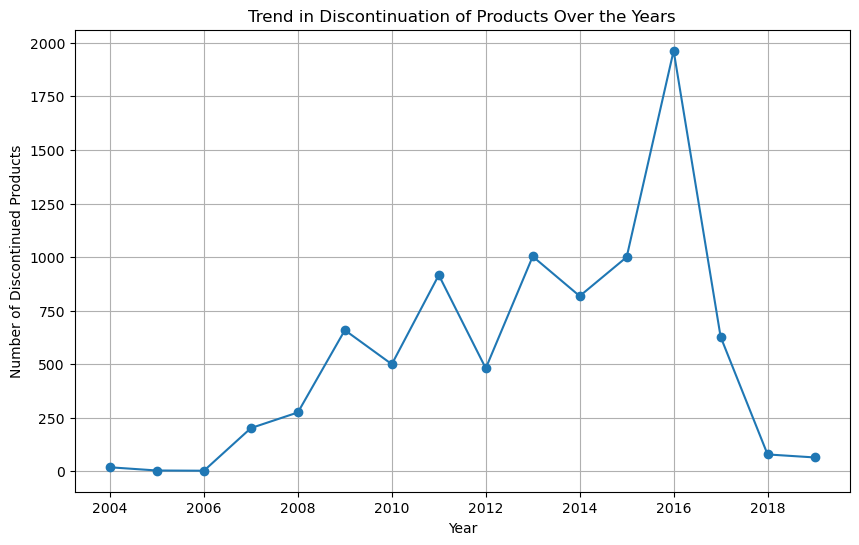

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(discontinuation_trend['DiscontinuedYear'], discontinuation_trend['DiscontinuedCount'], marker='o')
plt.title('Trend in Discontinuation of Products Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Discontinued Products')
plt.grid(True)
plt.show()

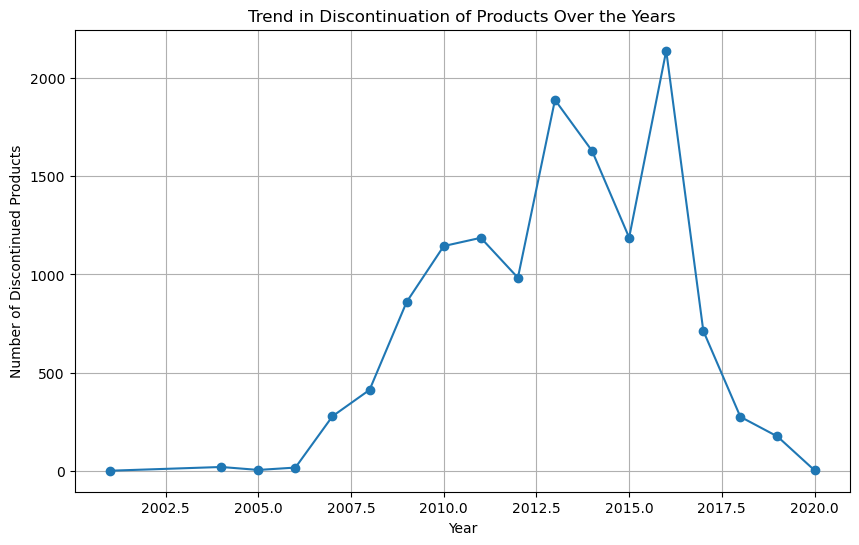

In [44]:
beauty['DiscontinuedDate'] = pd.to_datetime(beauty['DiscontinuedDate'])

# Extract year from DiscontinuedDate
beauty['DiscontinuedYear'] = beauty['DiscontinuedDate'].dt.year

# Group by DiscontinuedYear and count the number of products discontinued each year
discontinuation_trend = beauty.groupby('DiscontinuedYear').size().reset_index(name='DiscontinuedCount')

# Plotting the discontinuation trend
plt.figure(figsize=(10, 6))
plt.plot(discontinuation_trend['DiscontinuedYear'], discontinuation_trend['DiscontinuedCount'], marker='o')
plt.title('Trend in Discontinuation of Products Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Discontinued Products')
plt.grid(True)
plt.show()